# 5 Noisy Data Analysis

In [1]:
import sys

sys.path.append("../../")
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model, find_best_model

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2023-12-15 00:06:54.882452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 00:06:55.622163: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/micromamba/envs/paper/lib/python3.10/site-packages/cv2/../../lib64:
2023-12-15 00:06:55.622228: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/micromamba/envs/paper/

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data


In [3]:
# Specify the filename and the path to save the file
filename = "./data_raw_unmod.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, SHO_fit_func_LSQF=SHO_fit_func_nn)


# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

# Benchmarking on Noisy Data

To benchmark on noisy data we conducted fits using both Adam and Trust Region Optimizers. We added noise in multiples of the standard deviation of the raw data. 

Training was saved after 900 seconds.

In [6]:
basepath = "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/7_4_2023_SpeedTestTraining_Noisy"
filename = "Batch_Trainging_SpeedTest.csv"

results = find_best_model(basepath, filename)

## Instantiate the Visualizer

In [7]:
# insatiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

BE_viz = Viz(dataset, printing, verbose=True, 
             SHO_ranges = [(0,1.5e-4), (1.31e6, 1.33e6), (-300, 0), (-np.pi, np.pi)],
             image_scalebar=image_scalebar)

# extracts the x and y data based on the noise
X_data_no_noise, Y_data = dataset.NN_data()


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None


## Noise Level 0, ADAM Optimizer

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
./Figures/Figure_5_1_Scaled Raw Data_noise0_optimizer_Adam.png
./Figures/Figure_5_1_Scaled Raw Data_noise0_optimizer_Adam.svg


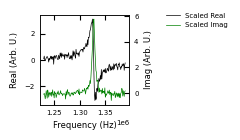

In [8]:
# Sets the dataset
noise = 0
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_1_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.1** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [9]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [10]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0340
Trust Region Mean Squared Error: 0.0335
LSQF Mean Squared Error: 0.0345


#### Least Squares Fit

./Figures/Figure_5_2_NN_validation_noise_0.png
./Figures/Figure_5_2_NN_validation_noise_0.svg


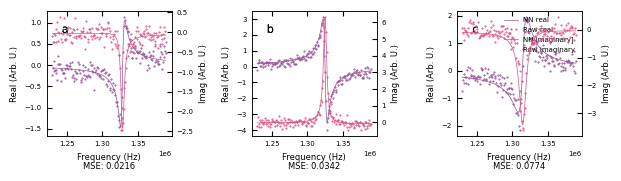

In [11]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_2_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.2** Visualization of the noisy (noise level 0) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_3_NN_validation_noise_0_Adam.png
./Figures/Figure_5_3_NN_validation_noise_0_Adam.svg


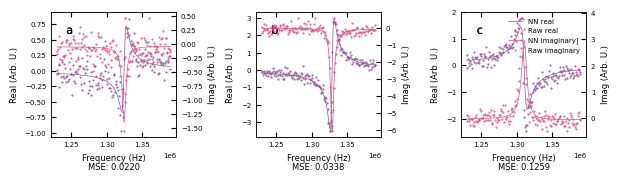

In [12]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_3_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.3** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_4_NN_validation_noise_0_Trust_Region.png
./Figures/Figure_5_4_NN_validation_noise_0_Trust_Region.svg


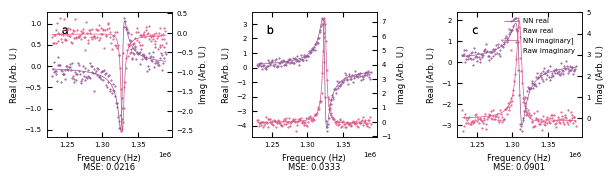

In [13]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_4_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.4** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  

    Dataset = Raw_Data
    Re

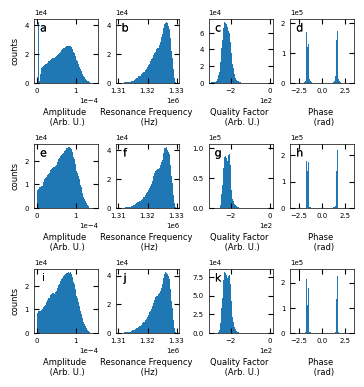

In [15]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

# adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

# trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_5_Histogram_comparison_{noise}_noise",)

**Figure 5.5** Histogram of the fit results for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers. 


    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_6_switching_maps_comparison_0_noise.png
./Figures/Figure_5_6_switching_maps_comparison_0_noise.svg


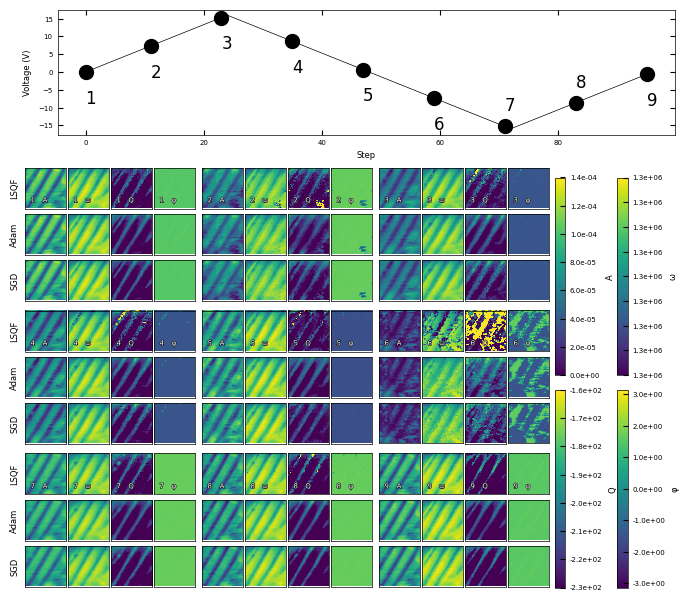

In [16]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_6_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.6** Visualize the switching based on the different models on the noisy data. 

In [17]:
BE_viz.SHO_fit_movie_images(noise = 0, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data


## Noise Level 1

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
./Figures/Figure_5_1_Scaled Raw Data_noise1_optimizer_Adam.png
./Figures/Figure_5_1_Scaled Raw Data_noise1_optimizer_Adam.svg


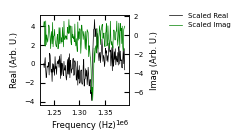

In [18]:
# Sets the dataset
noise = 1
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_7_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.7** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [19]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [20]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0346
Trust Region Mean Squared Error: 0.0343
LSQF Mean Squared Error: 0.0763


#### Least Squares Fit

./Figures/Figure_5_2_NN_validation_noise_1.png
./Figures/Figure_5_2_NN_validation_noise_1.svg


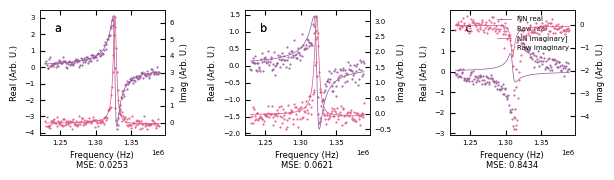

In [21]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_8_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.8** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_3_NN_validation_noise_1_Adam.png
./Figures/Figure_5_3_NN_validation_noise_1_Adam.svg


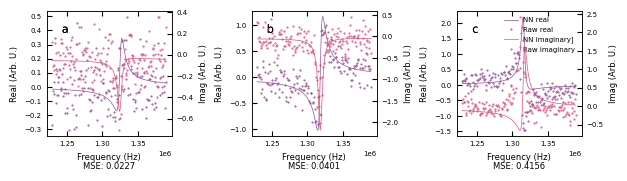

In [22]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_9_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.9** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_4_NN_validation_noise_1_Trust_Region.png
./Figures/Figure_5_4_NN_validation_noise_1_Trust_Region.svg


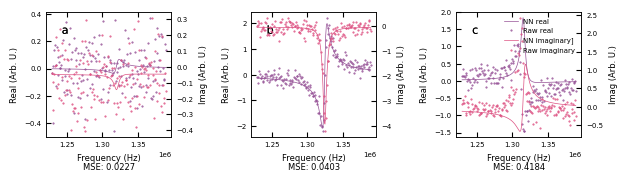

In [23]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_10_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.10** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  

    Dataset = Noi

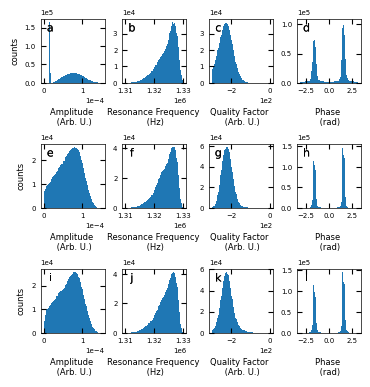

In [24]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

# adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

# trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_11_Histogram_comparison_{noise}_noise",)

**Figure 5.11** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None



    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_6_switching_maps_comparison_1_noise.png
./Figures/Figure_5_6_switching_maps_comparison_1_noise.svg


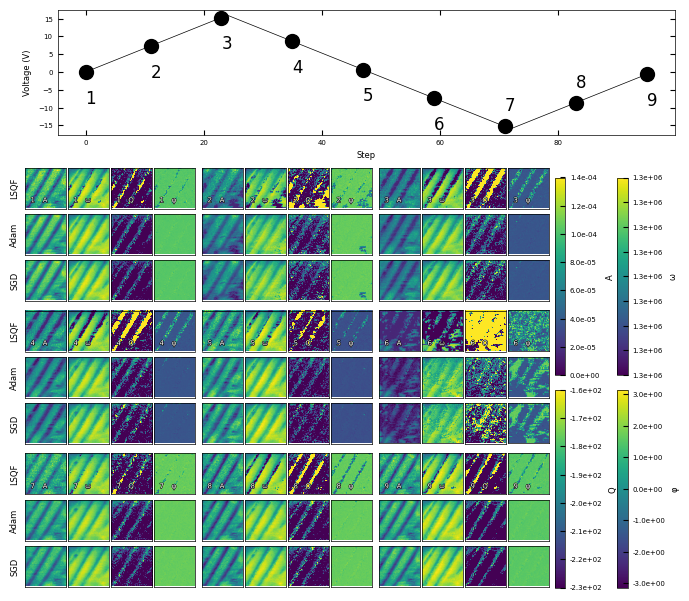

In [25]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_12_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.12** Visualize the switching based on the different models on the noisy data. 

In [27]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset

## Noise Level 2

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
./Figures/Figure_5_13_Scaled Raw Data_noise2_optimizer_Adam.png
./Figures/Figure_5_13_Scaled Raw Data_noise2_optimizer_Adam.svg


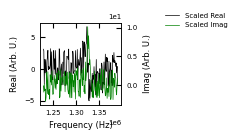

In [28]:
# Sets the dataset
noise = 2
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_13_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.13** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [29]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None


Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [30]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0355
Trust Region Mean Squared Error: 0.0347
LSQF Mean Squared Error: 0.2868


#### Least Squares Fit

./Figures/Figure_5_14_NN_validation_noise_2.png
./Figures/Figure_5_14_NN_validation_noise_2.svg


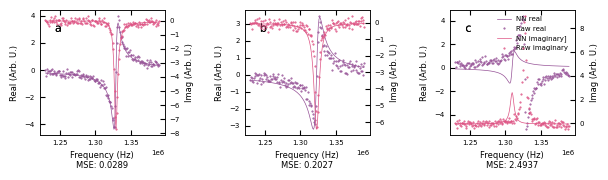

In [32]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_14_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.14** Visualization of the noisy (noise level 2) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_15_NN_validation_noise_2_Adam.png
./Figures/Figure_5_15_NN_validation_noise_2_Adam.svg


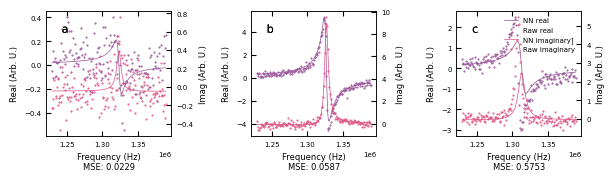

In [33]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_15_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.15** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_16_NN_validation_noise_2_Trust_Region.png
./Figures/Figure_5_16_NN_validation_noise_2_Trust_Region.svg


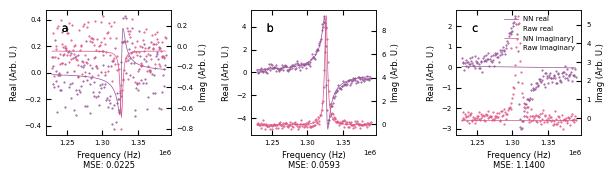

In [34]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_16_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.16** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None



    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None

    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  

    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  

    Dataset = Noisy_Da

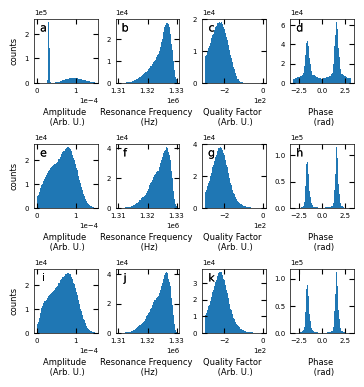

In [35]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_16_Histogram_comparison_{noise}_noise",)

**Figure 5.16** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None

    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_17_switching_maps_comparison_2_noise.png
./Figures/Figure_5_17_switching_maps_comparison_2_noise.svg


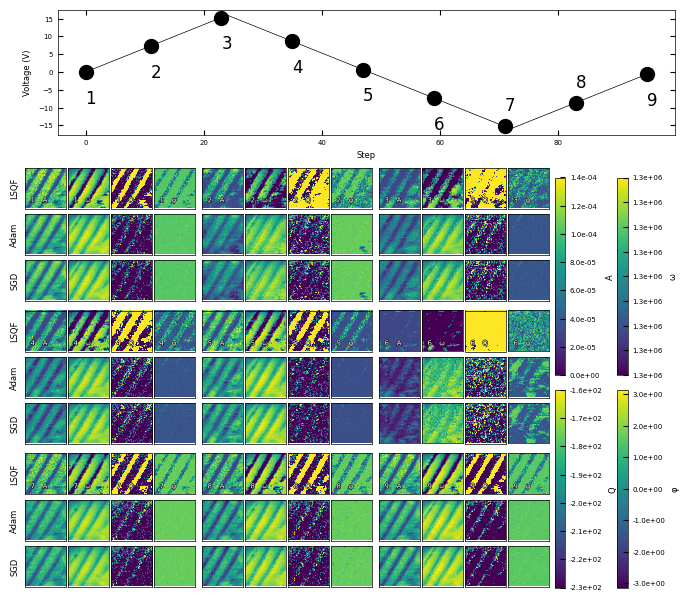

In [36]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_17_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.17** Visualize the switching based on the different models on the noisy data. 

In [37]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None



    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None

    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None

    Dataset = Noisy_Data_2
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 2
                  
None
Movies/SHO_

## Noise Level 3

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
./Figures/Figure_5_18_Scaled Raw Data_noise3_optimizer_Adam.png
./Figures/Figure_5_18_Scaled Raw Data_noise3_optimizer_Adam.svg


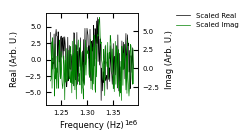

In [43]:
# Sets the dataset
noise = 3
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_18_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.18** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [44]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None


Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [45]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0389
Trust Region Mean Squared Error: 0.0401
LSQF Mean Squared Error: 0.7959


#### Least Squares Fit

./Figures/Figure_5_19_NN_validation_noise_3.png
./Figures/Figure_5_19_NN_validation_noise_3.svg


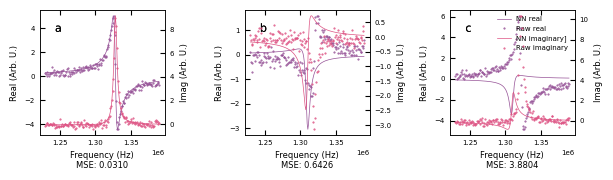

In [46]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_19_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.19** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_20_NN_validation_noise_3_Adam.png
./Figures/Figure_5_20_NN_validation_noise_3_Adam.svg


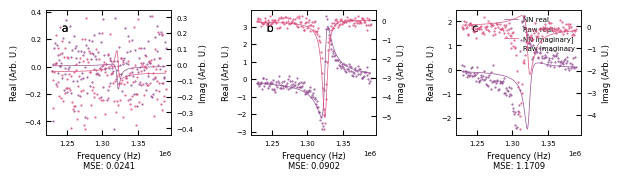

In [47]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_20_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.20** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_21_NN_validation_noise_3_Trust_Region.png
./Figures/Figure_5_21_NN_validation_noise_3_Trust_Region.svg


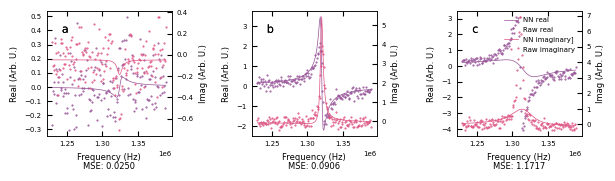

In [48]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_21_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.21** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None

    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None

    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  

    Dataset = Noi

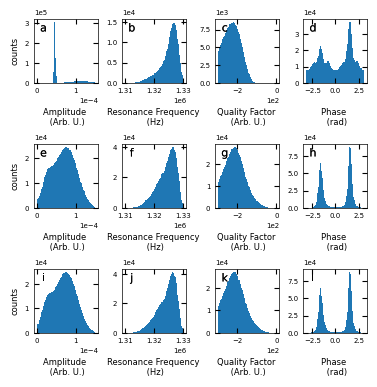

In [49]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_22_Histogram_comparison_{noise}_noise",)

**Figure 5.22** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None



    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_23_switching_maps_comparison_3_noise.png
./Figures/Figure_5_23_switching_maps_comparison_3_noise.svg


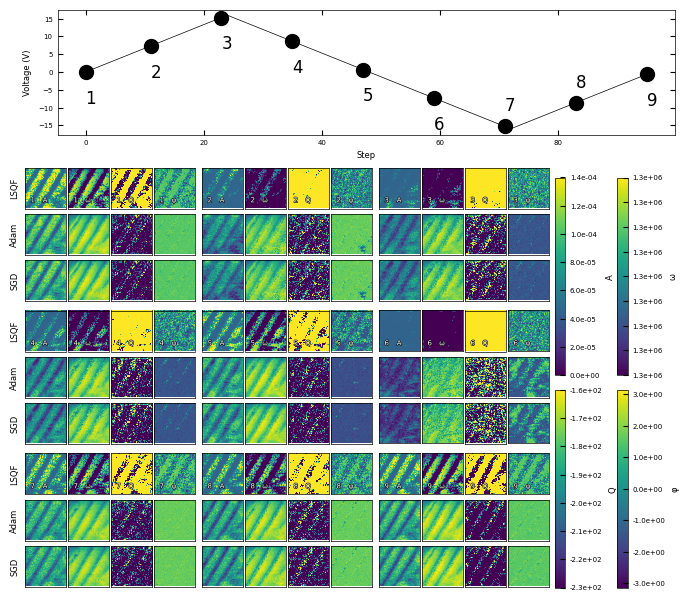

In [50]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_23_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.23** Visualize the switching based on the different models on the noisy data. 

In [51]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None



    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None

    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None

    Dataset = Noisy_Data_3
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 3
                  
None
Movies/SHO_

## Noise Level 4

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
./Figures/Figure_5_24_Scaled Raw Data_noise4_optimizer_Adam.png
./Figures/Figure_5_24_Scaled Raw Data_noise4_optimizer_Adam.svg


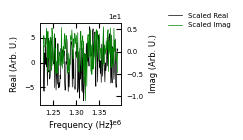

In [52]:
# Sets the dataset
noise = 4
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_24_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.24** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [53]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [54]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0398
Trust Region Mean Squared Error: 0.0444
LSQF Mean Squared Error: 1.4295


#### Least Squares Fit

./Figures/Figure_5_25_NN_validation_noise_4.png
./Figures/Figure_5_25_NN_validation_noise_4.svg


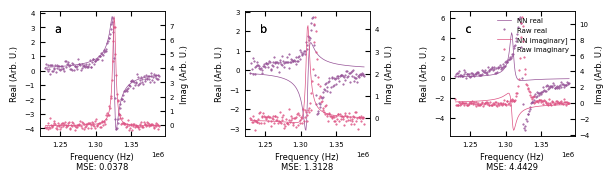

In [55]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_25_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.25** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_26_NN_validation_noise_4_Adam.png
./Figures/Figure_5_26_NN_validation_noise_4_Adam.svg


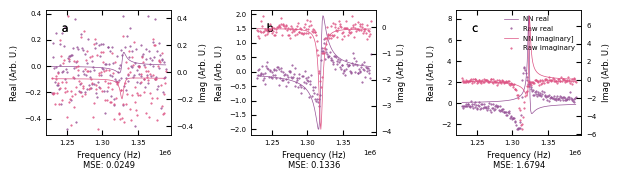

In [56]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_26_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.26** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_27_NN_validation_noise_4_Trust_Region.png
./Figures/Figure_5_27_NN_validation_noise_4_Trust_Region.svg


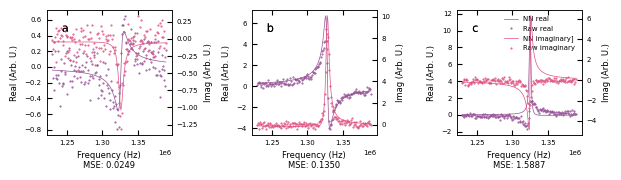

In [57]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_27_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.27** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None



    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None

    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  

    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  

    Dataset = Noisy_Da

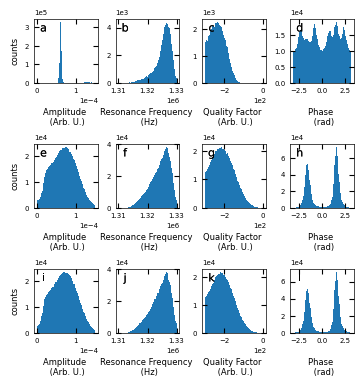

In [58]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

# adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

# trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_28_Histogram_comparison_{noise}_noise",)

**Figure 5.28** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None



    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_29_switching_maps_comparison_4_noise.png
./Figures/Figure_5_29_switching_maps_comparison_4_noise.svg


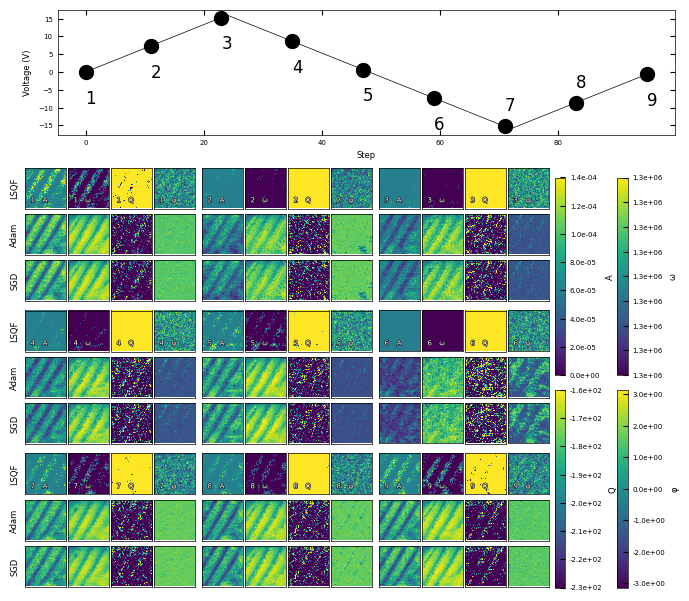

In [59]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_29_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.29** Visualize the switching based on the different models on the noisy data. 

In [60]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None



    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None

    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None

    Dataset = Noisy_Data_4
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 4
                  
None
Movies/SHO_

## Noise Level 5

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
./Figures/Figure_5_30_Scaled Raw Data_noise5_optimizer_Adam.png
./Figures/Figure_5_30_Scaled Raw Data_noise5_optimizer_Adam.svg


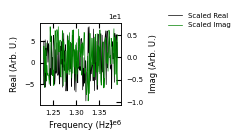

In [61]:
# Sets the dataset
noise = 5
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_30_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.30** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [62]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [63]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0434
Trust Region Mean Squared Error: 0.0481
LSQF Mean Squared Error: 1.9134


#### Least Squares Fit

./Figures/Figure_5_31_NN_validation_noise_5.png
./Figures/Figure_5_31_NN_validation_noise_5.svg


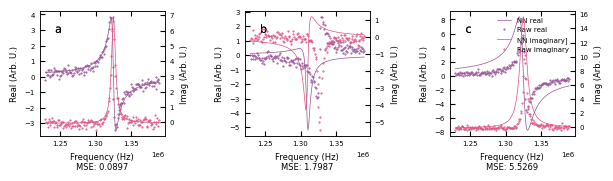

In [64]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_31_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.31** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_32_NN_validation_noise_5_Adam.png
./Figures/Figure_5_32_NN_validation_noise_5_Adam.svg


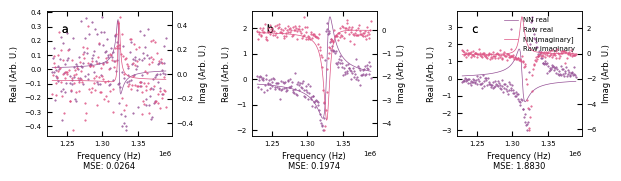

In [65]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_32_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.32** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_33_NN_validation_noise_5_Trust_Region.png
./Figures/Figure_5_33_NN_validation_noise_5_Trust_Region.svg


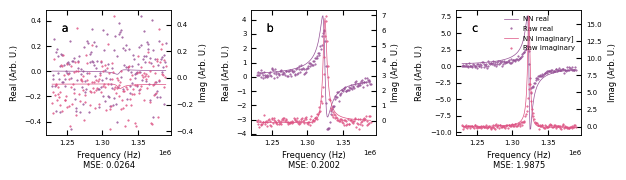

In [66]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_33_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.33** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 1
                  

    Dataset = Noi

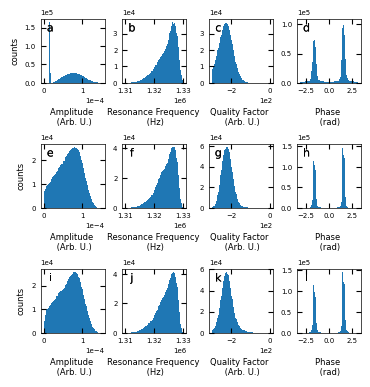

In [ ]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

# adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

# trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_34_Histogram_comparison_{noise}_noise",)

**Figure 5.34** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None



    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_35_switching_maps_comparison_5_noise.png
./Figures/Figure_5_35_switching_maps_comparison_5_noise.svg


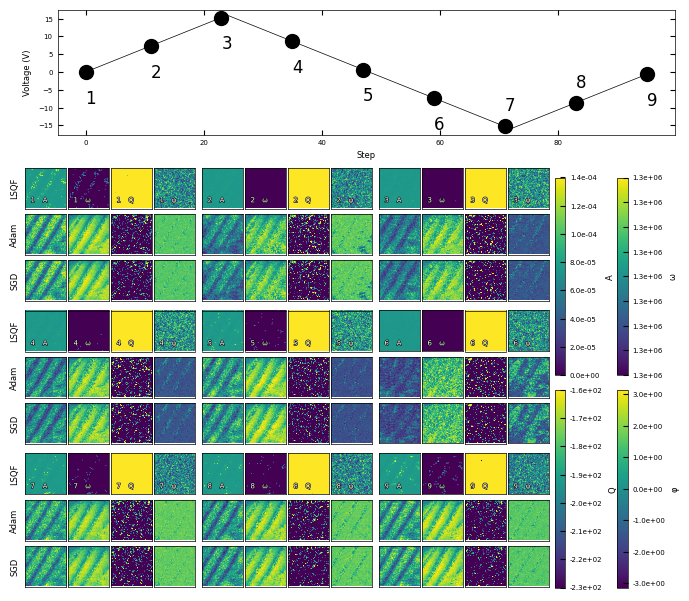

In [67]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_35_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.35** Visualize the switching based on the different models on the noisy data. 

In [68]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None



    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None

    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None

    Dataset = Noisy_Data_5
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 5
                  
None
Movies/SHO_

## Noise Level 6

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
./Figures/Figure_5_36_Scaled Raw Data_noise6_optimizer_Adam.png
./Figures/Figure_5_36_Scaled Raw Data_noise6_optimizer_Adam.svg


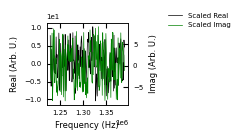

In [69]:
# Sets the dataset
noise = 6
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_36_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.36** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [70]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [71]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0889
Trust Region Mean Squared Error: 0.0730
LSQF Mean Squared Error: 2.3454


#### Least Squares Fit

./Figures/Figure_5_37_NN_validation_noise_6.png
./Figures/Figure_5_37_NN_validation_noise_6.svg


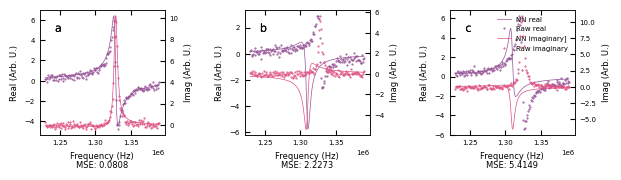

In [72]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_37_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.37** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_38_NN_validation_noise_6_Adam.png
./Figures/Figure_5_38_NN_validation_noise_6_Adam.svg


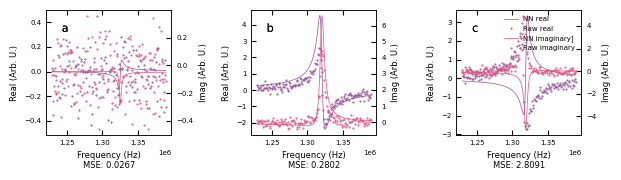

In [73]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_38_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.38** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_39_NN_validation_noise_6_Trust_Region.png
./Figures/Figure_5_39_NN_validation_noise_6_Trust_Region.svg


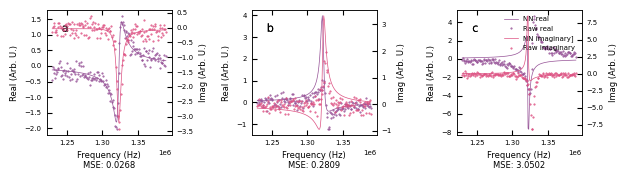

In [74]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_39_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.39** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None

    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None

    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  

    Dataset = Noi

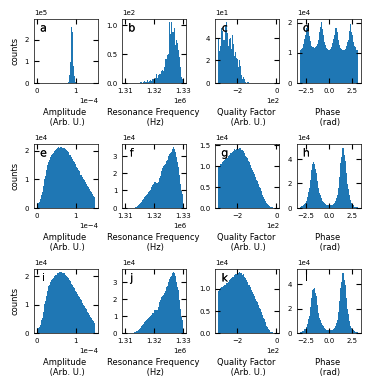

In [75]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_40_Histogram_comparison_{noise}_noise",)

**Figure 5.40** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None



    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_41_switching_maps_comparison_6_noise.png
./Figures/Figure_5_41_switching_maps_comparison_6_noise.svg


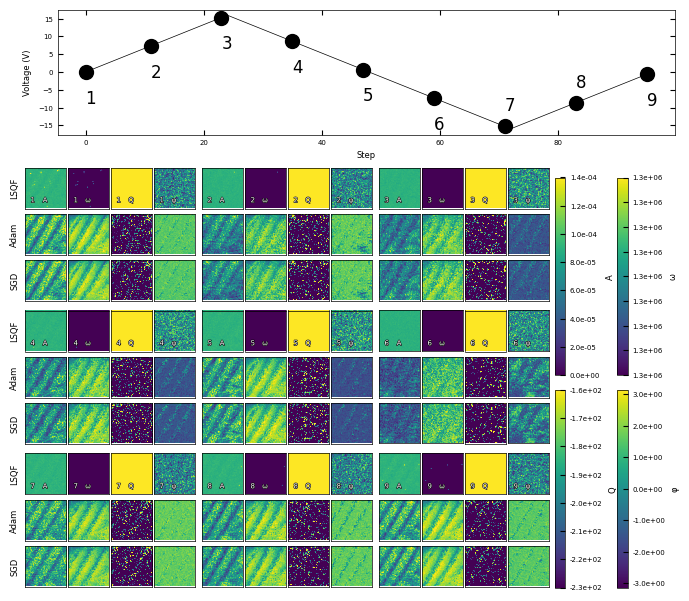

In [76]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_41_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.41** Visualize the switching based on the different models on the noisy data. 

In [77]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None



    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None

    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None

    Dataset = Noisy_Data_6
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 6
                  
None
Movies/SHO_

## Noise Level 7

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
./Figures/Figure_5_42_Scaled Raw Data_noise7_optimizer_Adam.png
./Figures/Figure_5_42_Scaled Raw Data_noise7_optimizer_Adam.svg


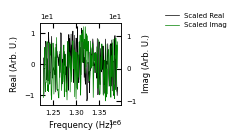

In [78]:
# Sets the dataset
noise = 7
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_42_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.42** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [79]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [80]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0652
Trust Region Mean Squared Error: 0.0628
LSQF Mean Squared Error: 2.8237


#### Least Squares Fit

./Figures/Figure_5_43_NN_validation_noise_7.png
./Figures/Figure_5_43_NN_validation_noise_7.svg


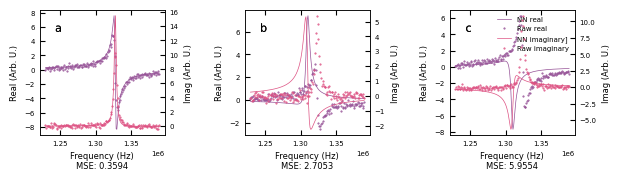

In [81]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_43_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.43** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_44_NN_validation_noise_7_Adam.png
./Figures/Figure_5_44_NN_validation_noise_7_Adam.svg


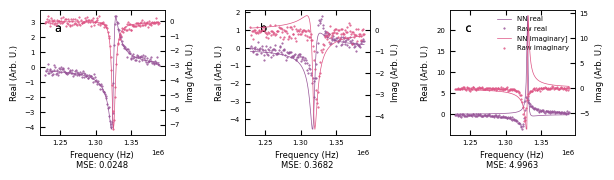

In [82]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_44_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.44** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_45_NN_validation_noise_7_Trust_Region.png
./Figures/Figure_5_45_NN_validation_noise_7_Trust_Region.svg


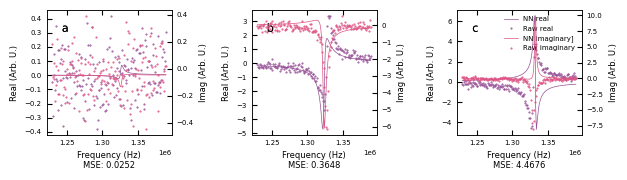

In [83]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_45_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.45** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None

    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None

    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  

    Dataset = Noi

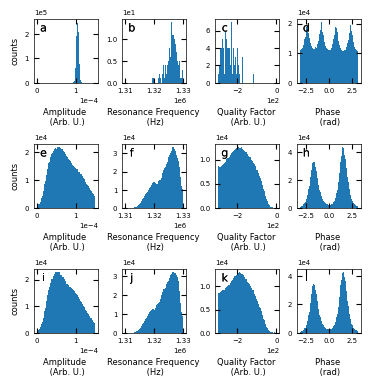

In [84]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

# adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

# trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_46_Histogram_comparison_{noise}_noise",)

**Figure 5.46** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None



    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_47_switching_maps_comparison_7_noise.png
./Figures/Figure_5_47_switching_maps_comparison_7_noise.svg


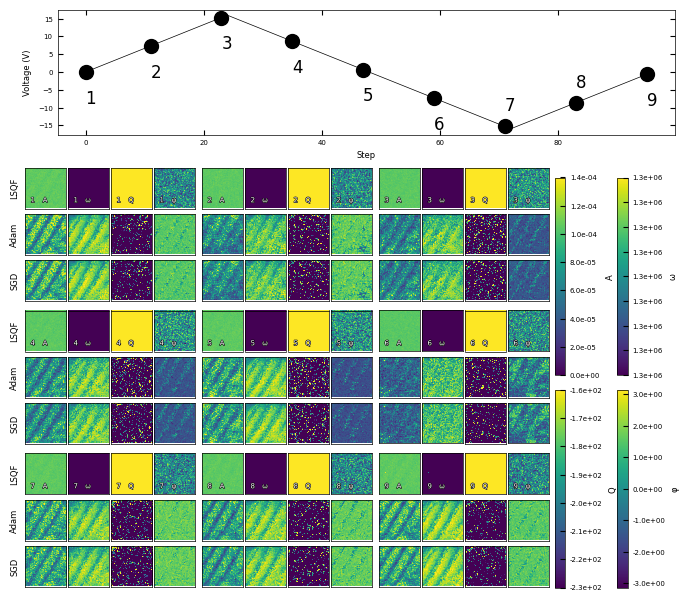

In [85]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_47_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.47** Visualize the switching based on the different models on the noisy data. 

In [86]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None



    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None

    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None

    Dataset = Noisy_Data_7
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 7
                  
None
Movies/SHO_

## Noise Level 8

### Scaling the Data

When training the neural network it is useful to scale the data. We apply a global scaler such that the spectrum have a mean of 0 and a standard deviation of 1.

#### Visualizing the Scaled Data



    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
./Figures/Figure_5_48_Scaled Raw Data_noise8_optimizer_Adam.png
./Figures/Figure_5_48_Scaled Raw Data_noise8_optimizer_Adam.svg


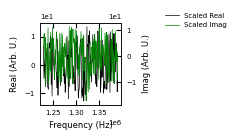

In [87]:
# Sets the dataset
noise = 8
optimizer = "Adam"

state = {"fitter": "LSQF", "resampled": True, "scaled": True, "label": "Scaled", "noise": noise}
dataset.set_attributes(**state)

BE_viz.nn_checker(state, filename=f"Figure_5_48_Scaled Raw Data_noise{noise}_optimizer_{optimizer}")

**Figure 5.48** Example visualization of the scaled, noisy data which is used for training.

### Extracts the Data and Models

In [88]:
# extracts the x and y data based on the noise
X_data, Y_data = dataset.NN_data()

# searches the trained models for the best model
model_name_adam = basepath + "/" + results[(noise, "Adam")]['filename'].split("//")[-1] 
model_name_trust_region = basepath + "/" + results[(noise, "Trust Region CG")]['filename'].split("//")[-1] 

# instantiate the model
model_adam = SHO_Model(dataset, training=False)

# instantiate the model
model_trust_region = SHO_Model(dataset, training=False)

model_adam.load(
    model_name_adam
)

model_trust_region.load(
    model_name_trust_region
)


    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = True
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None
Using GPU NVIDIA GeForce RTX 3090
Using GPU NVIDIA GeForce RTX 3090


### Evaluate the Fit Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by visualizing the best, median, and worst fits.

We will assume that the autoencoder is working correctly and thus will not consider the test train split.

Note: we are comparing the autoencoder results to the original data, not the noisy data. 


In [89]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}


BE_viz.MSE_compare(X_data_no_noise, [model_adam, model_trust_region, LSQF_], ["Adam", "Trust Region", "LSQF"])

Adam Mean Squared Error: 0.0991
Trust Region Mean Squared Error: 0.1119
LSQF Mean Squared Error: 3.3715


#### Least Squares Fit

./Figures/Figure_5_49_NN_validation_noise_8.png
./Figures/Figure_5_49_NN_validation_noise_8.svg


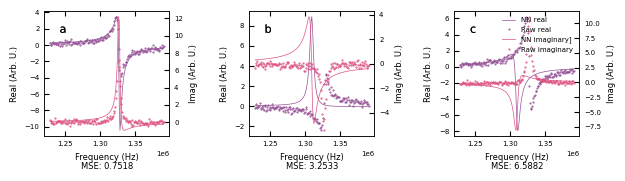

In [90]:

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=LSQF_,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_49_NN_validation_noise_{noise}",
    compare_state = X_data_no_noise,
)

**Figure 5.49** Visualization of the noisy (noise level 1) fit results from the least squares fitting algorithm shows the best, median, and worst fits.

#### Neural Network with Adam Optimizer

./Figures/Figure_5_50_NN_validation_noise_8_Adam.png
./Figures/Figure_5_50_NN_validation_noise_8_Adam.svg


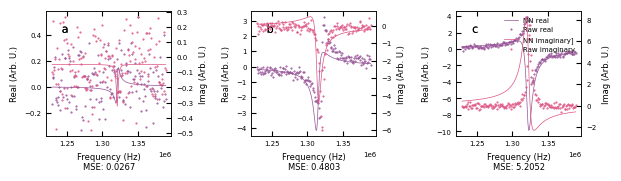

In [91]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_adam,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_50_NN_validation_noise_{noise}_Adam",
    compare_state = X_data_no_noise,
)

**Figure 5.50** Visualization of the noisy (noise level 0) fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

##### Neural Network with Trust Region Conjugate Gradient Optimizer

./Figures/Figure_5_51_NN_validation_noise_8_Trust_Region.png
./Figures/Figure_5_51_NN_validation_noise_8_Trust_Region.svg


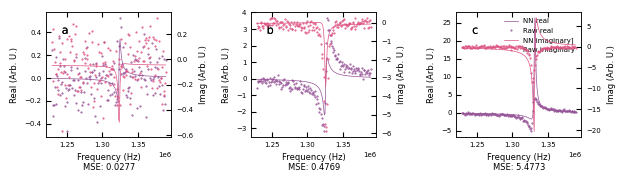

In [92]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_data,
    prediction=model_trust_region,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename=f"Figure_5_51_NN_validation_noise_{noise}_Trust_Region",
    compare_state = X_data_no_noise,
)

**Figure 5.51** Visualization of the noisy fit results from the neural network trained with the Adam optimizers. We shows the best, median, and worst fits.

### Histogram of Fit Results

It is useful to view the histogram of the fitting results to apply any necessary phase shifts, and to see if the results are reasonable.



    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None

    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None

    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  

    Dataset = Noi

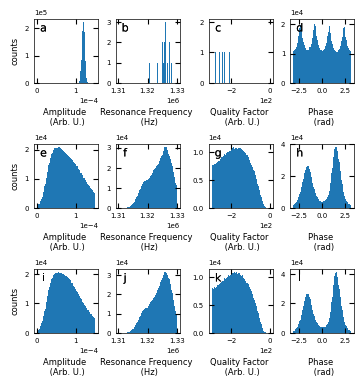

In [93]:
# make all the histograms the same bin range.

LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

dataset.set_attributes(**LSQF_)

LSQF_params = dataset.SHO_fit_results(state = LSQF_)

# adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

# trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_hist([LSQF_params, adam_params, trust_region_params], SHO_ranges = BE_viz.SHO_ranges, filename=f"Figure_5_52_Histogram_comparison_{noise}_noise",)

**Figure 5.52** Histogram of the fit results based on fits with noise 1 for the a-d. LSQF, e-h. neural network with ADAM, i-l. neural network with trust region optimizers.


    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None



    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = index
    Measurement State = all
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None
(1382400, 4)
(1382400, 4)
(1382400, 4)
./Figures/Figure_5_53_switching_maps_comparison_8_noise.png
./Figures/Figure_5_53_switching_maps_comparison_8_noise.svg


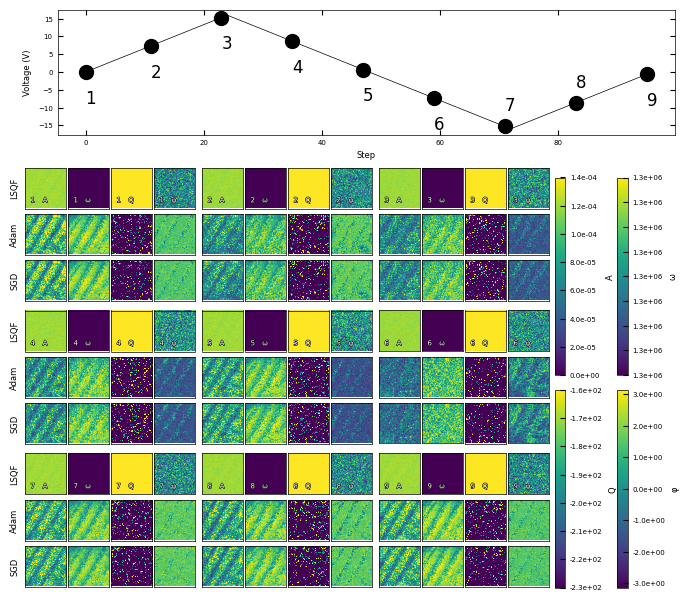

In [94]:
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': False,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': 1.5707963267948966,
                'NN_phase_shift': None,
                'noise': noise}

LSQF_Params = dataset.SHO_fit_results(state = LSQF_)

adam_params = dataset.SHO_fit_results(model = model_adam, phase_shift = np.pi / 2)

trust_region_params = dataset.SHO_fit_results(model = model_trust_region, phase_shift = np.pi / 2)

BE_viz.SHO_switching_maps_test([LSQF_Params, adam_params, trust_region_params], filename=f"Figure_5_53_switching_maps_comparison_{noise}_noise", labels=["LSQF", "Adam", "SGD"])

**Figure 5.53** Visualize the switching based on the different models on the noisy data. 

In [95]:
BE_viz.SHO_fit_movie_images(noise = noise, 
                            models = [None, model_adam, model_trust_region],
                            scalebar_= True, 
                            basepath = "Movies/SHO_NN_compare",  
                            filename="SHO_NN_compare",
                            phase_shift = [None, np.pi / 2, np.pi / 2])


    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None



    Dataset = Noisy_Data_8
    Resample = True
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = off
    Resample Resampled = True
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 8
                  
None
